In [55]:
#Author: Tyler Valdis Zudans

#This notebook is for a threat detection algorithms that take a bounded object
#in 2 frames and determines the trajectory and whether or not it is a threat

import matplotlib.pyplot as plt
import numpy as np

In [101]:
#Each frame of the frames is represented in the program with the following class
class box:
    def __init__(self,xmin,xmax,ymin,ymax):# points in pixels
        self.xmin=float(xmin)
        self.xmax=float(xmax)
        self.ymin=float(ymin)
        self.ymax=float(ymax)
        self.label= ""
    def x(self): # center of box x
        return((self.xmin+self.xmax)/2.0)
    def y(self): # center of box y
        return((self.ymin+self.ymax)/2.0)
    def w(self): #width of box
        return(self.xmax-self.xmin)
    def h(self):
        return(self.ymax-self.ymin)
    def get_lines(self):
        #plt.plot(plt.axvline(self.xmin, self.ymin, self.ymax, color='r'))#l
        lines =[
        plt.axvline(self.xmin, self.ymin, self.ymax, color='r',linewidth=10),#l
        plt.axvline(self.xmax, self.ymin, self.ymax, color='r',linewidth=2),#r
        plt.axhline(self.ymax,self.xmin,self.xmax, color='r',linewidth=2),#top
        plt.axhline(self.ymin,self.xmin,self.xmax, color='r',linewidth=2)#bot
        ]
        return lines
        #plt.show()
    def area(self):
        return(self.w()*self.h())
    def plot_box(self,c):
        #plt.plot(plt.axvline(self.xmin, self.ymin, self.ymax, color='r'))#l\
        l =2
        plt.plot([self.xmin, self.xmin],[self.ymax,self.ymin], color=c,linewidth=l),#l
        plt.plot([self.xmax, self.xmax],[self.ymax,self.ymin], color=c,linewidth=l),#r
        plt.plot([self.xmax, self.xmin],[self.ymax,self.ymax], color=c,linewidth=l),#t
        plt.plot([self.xmax, self.xmin],[self.ymin,self.ymin], color=c,linewidth=l),#b
        plt.plot([self.x()],[self.y()],'o',color = c)#c
        #plt.text(self.x()+o,self.y()+o,self.label,color = c)
    def plot_label(self):
        o = 10

        plt.text(self.x()+o,self.y()+o,self.label,bbox=dict(boxstyle="square",
                   ec=(0.3, 0.3, 0.3),#outline color
                   fc=(1., 1., 1.),
                   )
        )
    def contains(self,x,y):
        return(x>self.xmin and x<self.xmax and y<self.ymax and y> self.ymin)

In [102]:
class Threat:
    def __init__(self,box, time):# points in pixels
        self.box= box
        self.time = time

In [103]:
frame1 = box(400,500,100,200)
frame2 = box(350,470,90,250)
camera = box(0,640,0,400)
delT = 1.5

In [104]:
def detectThreat(frame1,frame2,camera,delT):
    delX=frame2.x()-frame1.x()
    delY=frame2.y()-frame1.y()
    tf = delT
    if(delX!=0):
        tf=delT*(camera.x()-frame2.x())/(delX)
    def y(t):
        return frame2.y()+(delY)*t
    y_col = y(tf)
    x_col = camera.x()
    h_col = frame2.h()+(frame2.h()-frame1.h())*tf/delT
    w_col = frame2.w()+(frame2.w()-frame1.w())*tf/delT
    def yxht_to_box(y,x,h,w):
        h2 = h_col/2
        w2 = w_col/2
        return box(x-w2,x+w2,y-h2,y+h2)
    return Threat(yxht_to_box(y_col,x_col,h_col,w_col),tf)
    

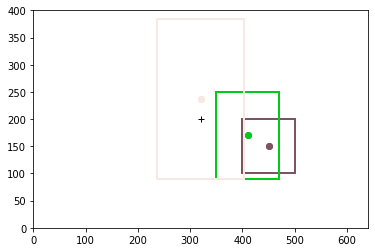

In [105]:
boxes = [frame1,frame2]
# the first figure

def plot_collision(camera,boxes):
    for box in boxes:
        plt.plot([box.x()],[box.y()],'ro')
    #plt.axis([camera.xmin, camera.xmax, camera.ymin, camera.ymax])
    #plt.show()
def plot_collision_boxes(camera,boxes):
    for box in boxes:
        #print box of random color
        color = np.random.rand(3,)
        plt.plot([box.x()],[box.y()],'o',color=color)
        box.plot_box(color)
    for box in boxes:
        box.plot_label()
        
    plt.plot(camera.x(),camera.y(),'k+')      
    plt.axis([camera.xmin, camera.xmax, camera.ymin, camera.ymax])
    plt.show()

boxes.append(detectThreat(frame1,frame2,camera,delT).box)
plot_collision_boxes(camera,boxes)
#plot_collision(camera,boxes)


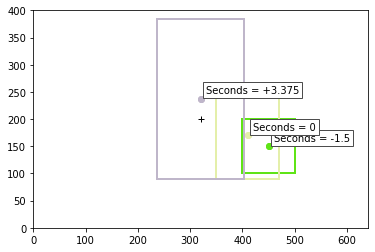

True

In [119]:
#Display and use threat information
def threatInfo(frame1,frame2,camera,delT,suppress_output = False,close = 0.1,soon = 5.0):
    #threshold for dangerous size as percentage of screen
    #now in parameters
    
    #threshold for how much time it must be from collision
    #now in parameters
    collision = detectThreat(frame1,frame2,camera,delT);
    
    
    
    #send warning if is a threat
    collision_true = collision.box.area()>camera.area()*close #object is large enough
    collision_true = collision_true and collision.time <soon #object will collide before "soon"
    collision_true = collision_true and collision.box.contains(camera.x(),camera.y()) #center of camera is in object
    collision_true = collision_true and collision.time > 0 #collsion is in future, not past
    
    
    if(collision_true):
        if(not suppress_output):
            #Create Labels
            frame1.label = "Seconds = -"+str(delT)
            frame2.label = "Seconds = 0"
            collision.box.label = "Seconds = +"+str(collision.time)
            
            #Display Danger
            plot_collision_boxes(camera,[frame1,frame2,collision.box])
            print("WARNING: Object approching from "+ getRelativeLocation(camera,collision.box)+", collision in ",collision.time," seconds")
        return True
    return False
    
def getRelativeLocation(camera,box):
    up = "below"
    right = "right"
    if(box.y()<camera.y()):
        up="above";
    if(box.x()<camera.x()):
        right = "left"
    return((up+" and to the "+right))

threatInfo(frame1,frame2,camera,delT)    


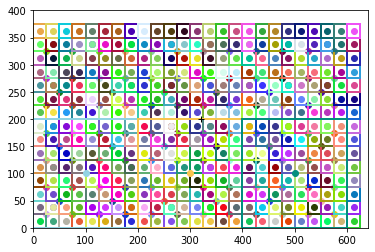

Boxes generated


In [111]:
boxes_set=[]

#build boxes set
side = 50
for x in range(0,640-side,side):
    for y in range(0,400-side,side):
        boxes_set.append(box(x,x+side,y,y+side))
side = 100
for x in range(0,640-side,side):
    for y in range(0,400-side,side):
        boxes_set.append(box(x,x+side,y,y+side))
side = 75
for x in range(0,640-side,side):
    for y in range(0,400-side,side):
        boxes_set.append(box(x,x+side,y,y+side))
side = 25
for x in range(0,640-side,side):
    for y in range(0,400-side,side):
        boxes_set.append(box(x,x+side,y,y+side))
side = 200
for x in range(0,640-side,side):
    for y in range(0,400-side,side):
        boxes_set.append(box(x,x+side,y,y+side))


#plot all boxes        
for box1 in boxes_set:
    box1.plot_box(c=np.random.rand(3,))
plt.plot(camera.x(),camera.y(),'k+')      
plt.axis([camera.xmin, camera.xmax, camera.ymin, camera.ymax])
plt.show()
print("Boxes generated")


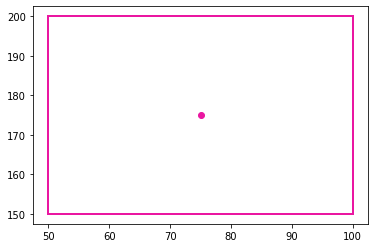

In [112]:
#test 1 box against many
s_frame = 10
starting_box = boxes_set[s_frame]

dt= 1.0
starting_box.plot_box(c=np.random.rand(3,))
for i in range(0,len(boxes_set)):
    threatInfo(starting_box, boxes_set[i],camera,dt)


In [121]:
#test all collisions
dt= 1.0
collisions = 0
set_size = len(boxes_set)
for i in range(0,len(boxes_set)):
    for j in range(0,len(boxes_set)):
        if(threatInfo(boxes_set[j], boxes_set[i],camera,dt,True)):#boolean determines if graphs are suppressed for quicker run_time
            collisions = collisions+1
        #if((i*set_size+j)%100000==0):
        #    print(i*set_size+j,"/",set_size**2)
print("Predicted ",collisions,"/",(len(boxes_set)**2 - len(boxes_set))," unique scenarios were at imminent risk of collision")

Predicted  464 / 269880  unique scenarios were at imminent risk of collision


In [132]:
def testCollisions(close,soon,suppress = False,deepSuppress = True):
    dt= 1.0
    collisions = 0
    set_size = len(boxes_set)
    for i in range(0,len(boxes_set)):
        for j in range(0,len(boxes_set)):
            if(threatInfo(boxes_set[j], boxes_set[i],camera,dt,deepSuppress,close,soon)):#boolean determines if graphs are suppressed for quicker run_time
                collisions = collisions+1
        #if((i*set_size+j)%100000==0):
        #    print(i*set_size+j,"/",set_size**2)
    if(not suppress):
        print("For",close*100,"% threshold and",soon,"second forsight algorithm predicted ",collisions,"/",(len(boxes_set)**2 - len(boxes_set))," unique scenarios were at risk of collision")
    return collisions
testCollisions(0.1,5)
testCollisions(0.1,10)


For 10.0 % threshold and 5 second forsight algorithm predicted  464 / 269880  unique scenarios were at risk of collision
For 10.0 % threshold and 10 second forsight algorithm predicted  608 / 269880  unique scenarios were at risk of collision


608

In [133]:
#test many orientations
print("TESTING MULTIPLE VALUES FOR COLLISION SENSITIVITY")

closes=[0, 0.05,0.1,0.2,0.25,0.3,0.5,0.7,1]
soons = [10,5,3]

for close in closes:
    for soon in soons:
        print("[",close*100,"%,",soon,"s]=> ",testCollisions(close,soon,True),"/",(len(boxes_set)**2 - len(boxes_set)))
    print("")

TESTING MULTIPLE VALUES FOR COLLISION SENSITIVITY
[ 0 %, 10 s]=>  3587 / 269880
[ 0 %, 5 s]=>  3435 / 269880
[ 0 %, 3 s]=>  3254 / 269880

[ 5.0 %, 10 s]=>  1127 / 269880
[ 5.0 %, 5 s]=>  983 / 269880
[ 5.0 %, 3 s]=>  828 / 269880

[ 10.0 %, 10 s]=>  608 / 269880
[ 10.0 %, 5 s]=>  464 / 269880
[ 10.0 %, 3 s]=>  366 / 269880

[ 20.0 %, 10 s]=>  339 / 269880
[ 20.0 %, 5 s]=>  228 / 269880
[ 20.0 %, 3 s]=>  137 / 269880

[ 25.0 %, 10 s]=>  278 / 269880
[ 25.0 %, 5 s]=>  174 / 269880
[ 25.0 %, 3 s]=>  94 / 269880

[ 30.0 %, 10 s]=>  238 / 269880
[ 30.0 %, 5 s]=>  144 / 269880
[ 30.0 %, 3 s]=>  75 / 269880

[ 50.0 %, 10 s]=>  175 / 269880
[ 50.0 %, 5 s]=>  92 / 269880
[ 50.0 %, 3 s]=>  45 / 269880

[ 70.0 %, 10 s]=>  141 / 269880
[ 70.0 %, 5 s]=>  72 / 269880
[ 70.0 %, 3 s]=>  45 / 269880

[ 100 %, 10 s]=>  104 / 269880
[ 100 %, 5 s]=>  49 / 269880
[ 100 %, 3 s]=>  31 / 269880



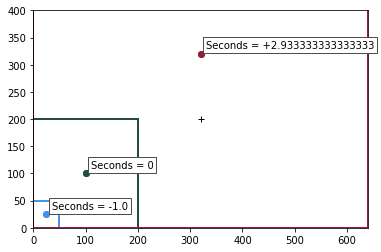

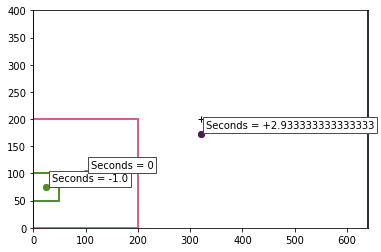

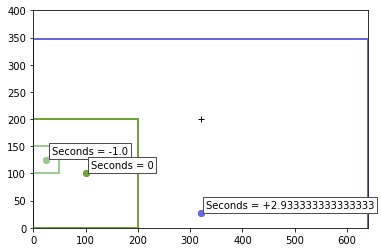

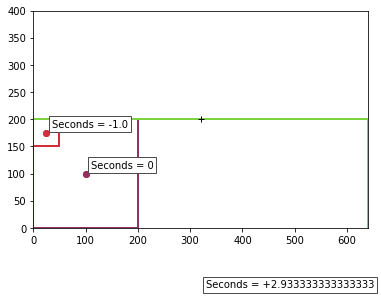

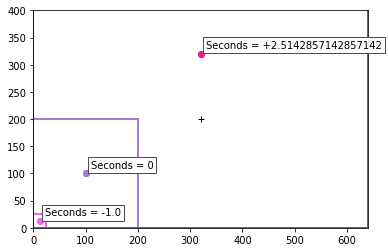

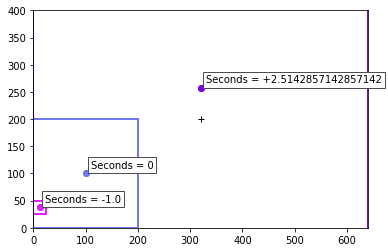

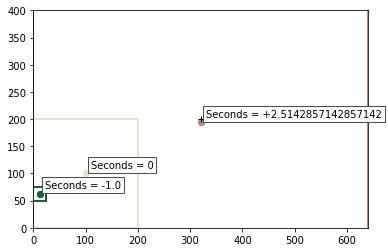

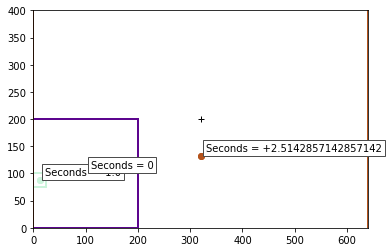

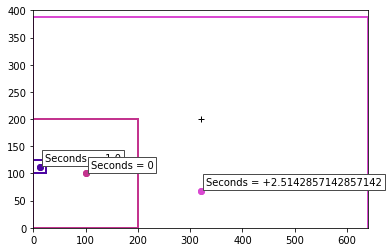

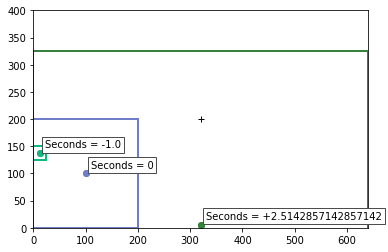

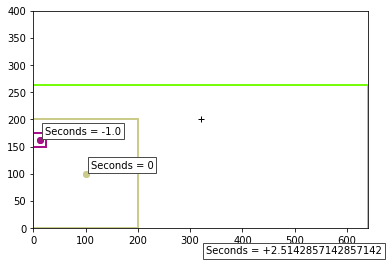

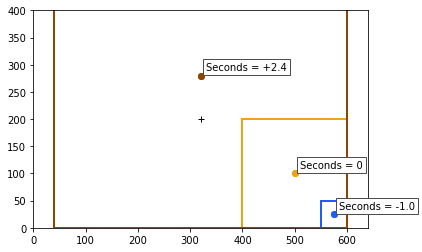

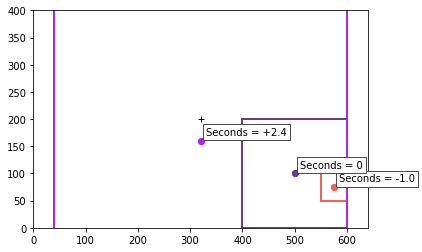

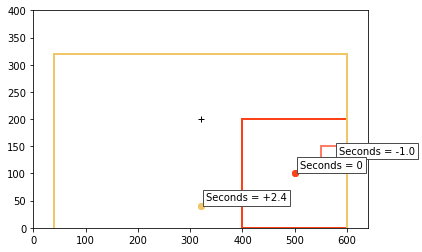

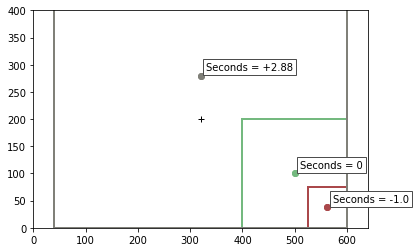

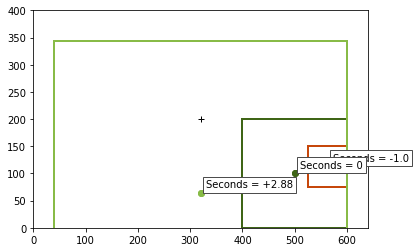

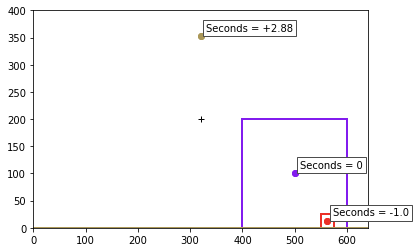

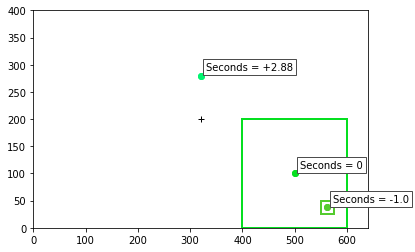

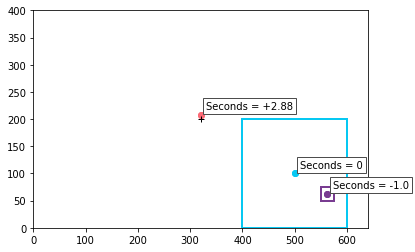

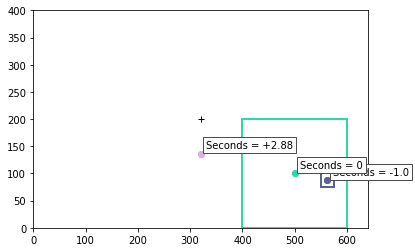

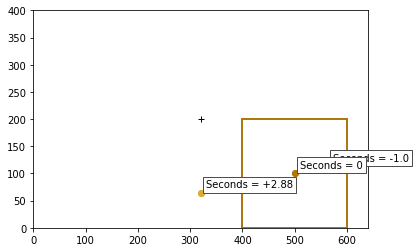

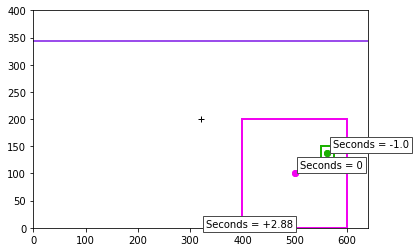

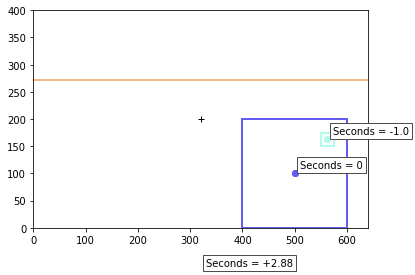

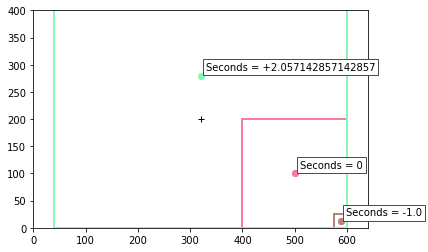

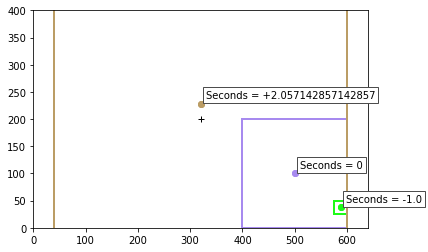

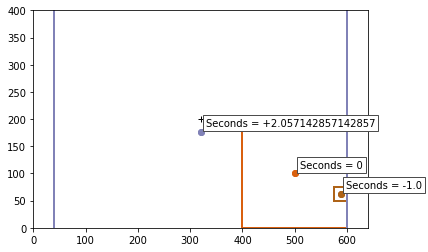

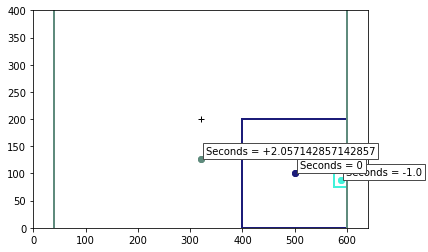

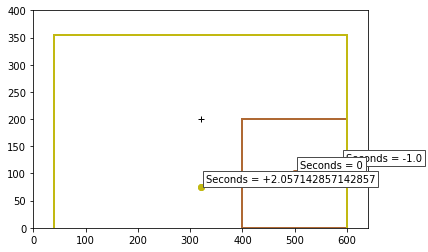

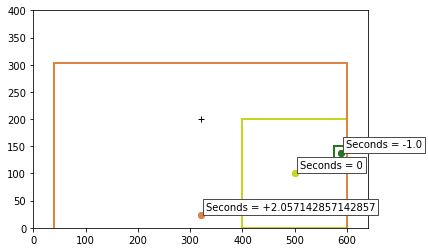

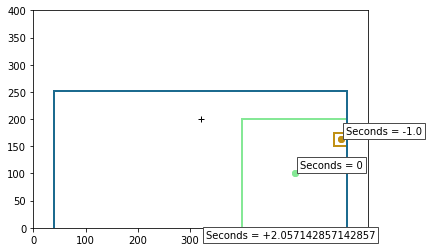

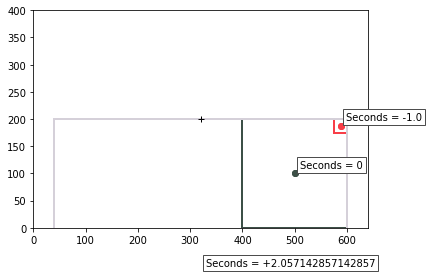

For 100 % threshold and 3 second forsight algorithm predicted  31 / 269880  unique scenarios were at risk of collision


31

In [136]:
#Showing large collisions
testCollisions(1,3,False,False)

In [2]:
#Collision detector for python v1.0
#Author: Tyler V. Zudans

import matplotlib.pyplot as plt
import numpy as np

class box:#represents an on screen box such as a bounding box for an object or the camera's view
    def __init__(self,xmin,xmax,ymin,ymax):# points in pixels
        self.xmin=float(xmin)
        self.xmax=float(xmax)
        self.ymin=float(ymin)
        self.ymax=float(ymax)
        self.label= ""
    def x(self): # center of box x
        return((self.xmin+self.xmax)/2.0)
    def y(self): # center of box y
        return((self.ymin+self.ymax)/2.0)
    def w(self): #width of box
        return(self.xmax-self.xmin)
    def h(self):
        return(self.ymax-self.ymin)
    def get_lines(self):
        #plt.plot(plt.axvline(self.xmin, self.ymin, self.ymax, color='r'))#l
        lines =[
        plt.axvline(self.xmin, self.ymin, self.ymax, color='r',linewidth=10),#l
        plt.axvline(self.xmax, self.ymin, self.ymax, color='r',linewidth=2),#r
        plt.axhline(self.ymax,self.xmin,self.xmax, color='r',linewidth=2),#top
        plt.axhline(self.ymin,self.xmin,self.xmax, color='r',linewidth=2)#bot
        ]
        return lines
        #plt.show()
    def area(self):
        return(self.w()*self.h())
    def plot_box(self,c):
        #plt.plot(plt.axvline(self.xmin, self.ymin, self.ymax, color='r'))#l\
        l =2
        plt.plot([self.xmin, self.xmin],[self.ymax,self.ymin], color=c,linewidth=l),#l
        plt.plot([self.xmax, self.xmax],[self.ymax,self.ymin], color=c,linewidth=l),#r
        plt.plot([self.xmax, self.xmin],[self.ymax,self.ymax], color=c,linewidth=l),#t
        plt.plot([self.xmax, self.xmin],[self.ymin,self.ymin], color=c,linewidth=l),#b
        plt.plot([self.x()],[self.y()],'o',color = c)#c
        #plt.text(self.x()+o,self.y()+o,self.label,color = c)
    def plot_label(self):
        o = 10

        plt.text(self.x()+o,self.y()+o,self.label,bbox=dict(boxstyle="square",
                   ec=(0.3, 0.3, 0.3),#outline color
                   fc=(1., 1., 1.),
                   )
        )
    def contains(self,x,y):
        return(x>self.xmin and x<self.xmax and y<self.ymax and y> self.ymin)
class Threat:
    def __init__(self,box, time):# Represents the bounding box of a threat and its ETA
        self.box= box
        self.time = time

def detectThreat(frame1,frame2,camera,delT):#projects threat into future from current(f2) and past(f1) frames with elapsed time delT in the camera frame
    delX=frame2.x()-frame1.x()
    delY=frame2.y()-frame1.y()
    tf = delT
    if(delX!=0):
        tf=delT*(camera.x()-frame2.x())/(delX)
    def y(t):
        return frame2.y()+(delY)*t
    y_col = y(tf)
    x_col = camera.x()
    h_col = frame2.h()+(frame2.h()-frame1.h())*tf/delT
    w_col = frame2.w()+(frame2.w()-frame1.w())*tf/delT
    def yxht_to_box(y,x,h,w):
        h2 = h_col/2
        w2 = w_col/2
        return box(x-w2,x+w2,y-h2,y+h2)
    return Threat(yxht_to_box(y_col,x_col,h_col,w_col),tf)
def plot_collision(camera,boxes):
    for box in boxes:
        plt.plot([box.x()],[box.y()],'ro')
def plot_collision_boxes(camera,boxes):
    for box in boxes:
        #print box of random color
        color = np.random.rand(3,)
        plt.plot([box.x()],[box.y()],'o',color=color)
        box.plot_box(color)
    for box in boxes:
        box.plot_label()
        
    plt.plot(camera.x(),camera.y(),'k+')      
    plt.axis([camera.xmin, camera.xmax, camera.ymin, camera.ymax])
    plt.show()
def threatInfo(frame1,frame2,camera,delT,suppress_output = False,close = 0.1,soon = 5.0):
    #threshold for dangerous size as percentage of screen
    #now in parameters
    
    #threshold for how much time it must be from collision
    #now in parameters
    collision = detectThreat(frame1,frame2,camera,delT);
    
    
    
    #send warning if is a threat
    collision_true = collision.box.area()>camera.area()*close #object is large enough
    collision_true = collision_true and collision.time <soon #object will collide before "soon"
    collision_true = collision_true and collision.box.contains(camera.x(),camera.y()) #center of camera is in object
    collision_true = collision_true and collision.time > 0 #collsion is in future, not past
    
    
    if(collision_true):
        if(not suppress_output):
            #Create Labels
            frame1.label = "Seconds = -"+str(delT)
            frame2.label = "Seconds = 0"
            collision.box.label = "Seconds = +"+str(collision.time)
            
            #Display Danger
            plot_collision_boxes(camera,[frame1,frame2,collision.box])
            print("WARNING: Object approching from "+ getRelativeLocation(camera,collision.box)+", collision in ",collision.time," seconds")
        return True
    return False
    
def getRelativeLocation(camera,box):
    up = "below"
    right = "right"
    if(box.y()<camera.y()):
        up="above";
    if(box.x()<camera.x()):
        right = "left"
    return((up+" and to the "+right))
